# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Transforming target variable based on taxable income
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [4]:
#Encoding the categorical variables
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [5]:
#spliting data into features and target variable
X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

In [6]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [29]:
#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)


In [30]:
#grid search
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
#Geting the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [33]:
#Useing the best parameters to train the model
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree.fit(X_train, y_train)
#Making predictions
y_pred_best = best_decision_tree.predict(X_test)

In [52]:
#Evaluating the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.6875
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.72      0.81      0.76        47
           2       0.61      0.61      0.61        18
           3       0.67      0.43      0.52        14

    accuracy                           0.69        80
   macro avg       0.50      0.46      0.47        80
weighted avg       0.68      0.69      0.68        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


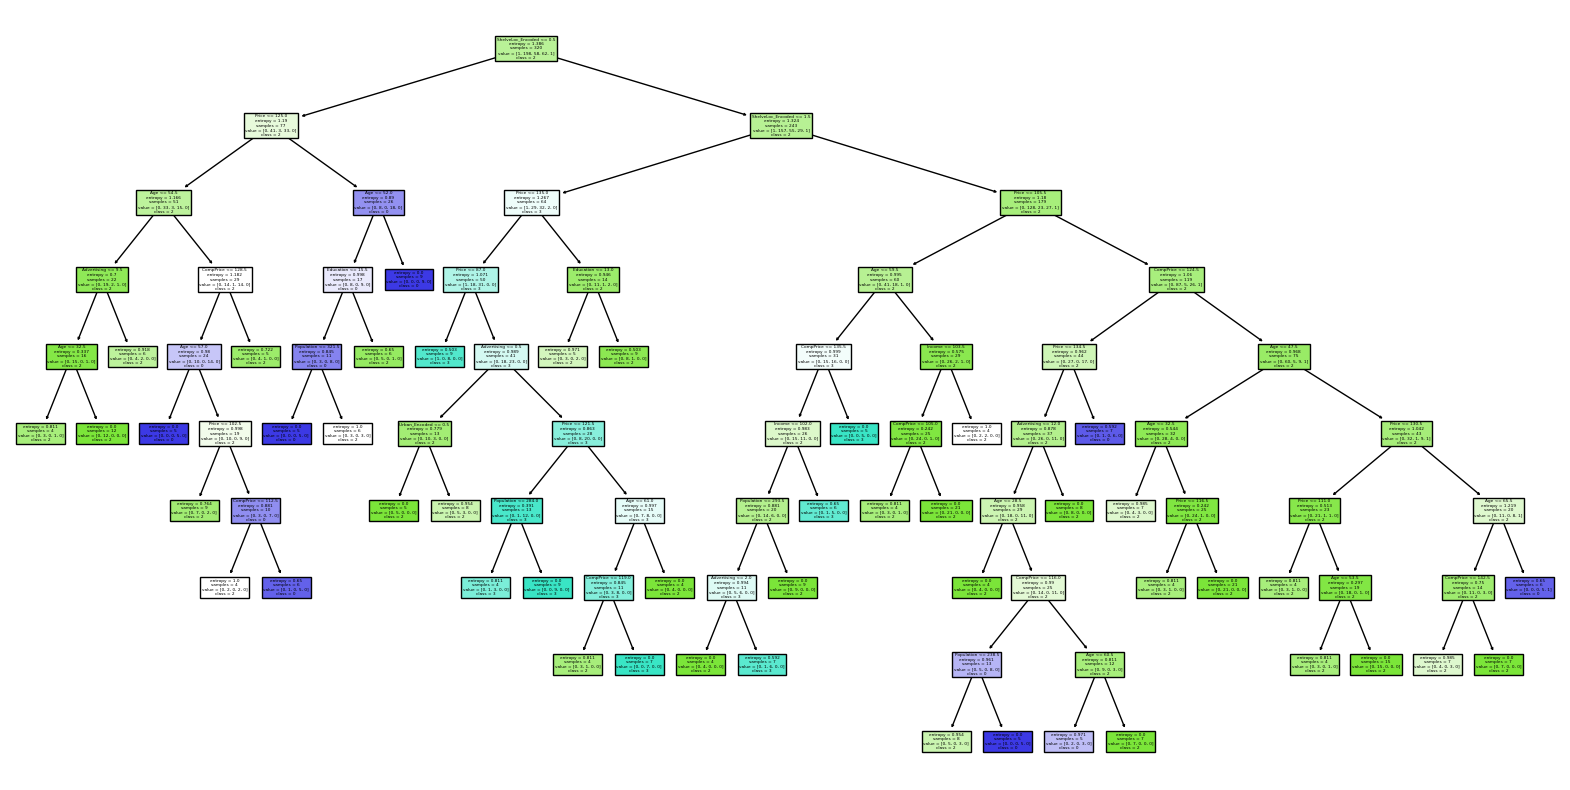

In [36]:
#takingunique classes in the target variable and convert them to strings
class_names = y_train.unique().astype(str)
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()

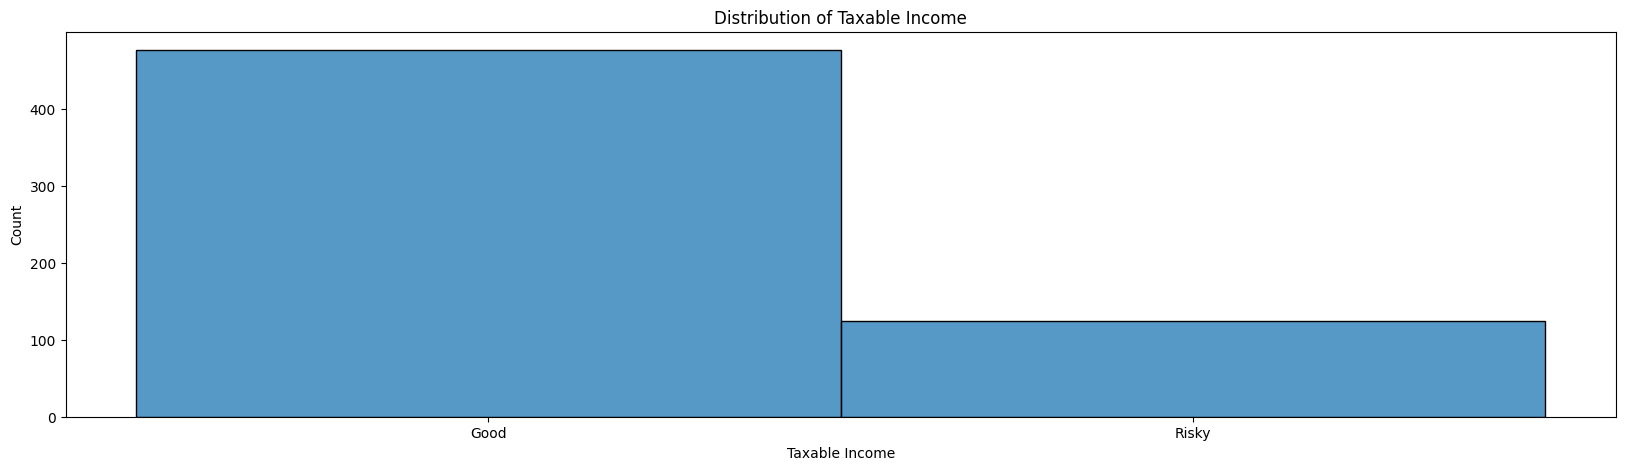

In [37]:
#Univariate Analysis
plt.figure(figsize=(20, 5))
sns.histplot(data['Taxable.Income'])
plt.title('Distribution of Taxable Income')
plt.xlabel('Taxable Income')
plt.ylabel('Count')
plt.show()

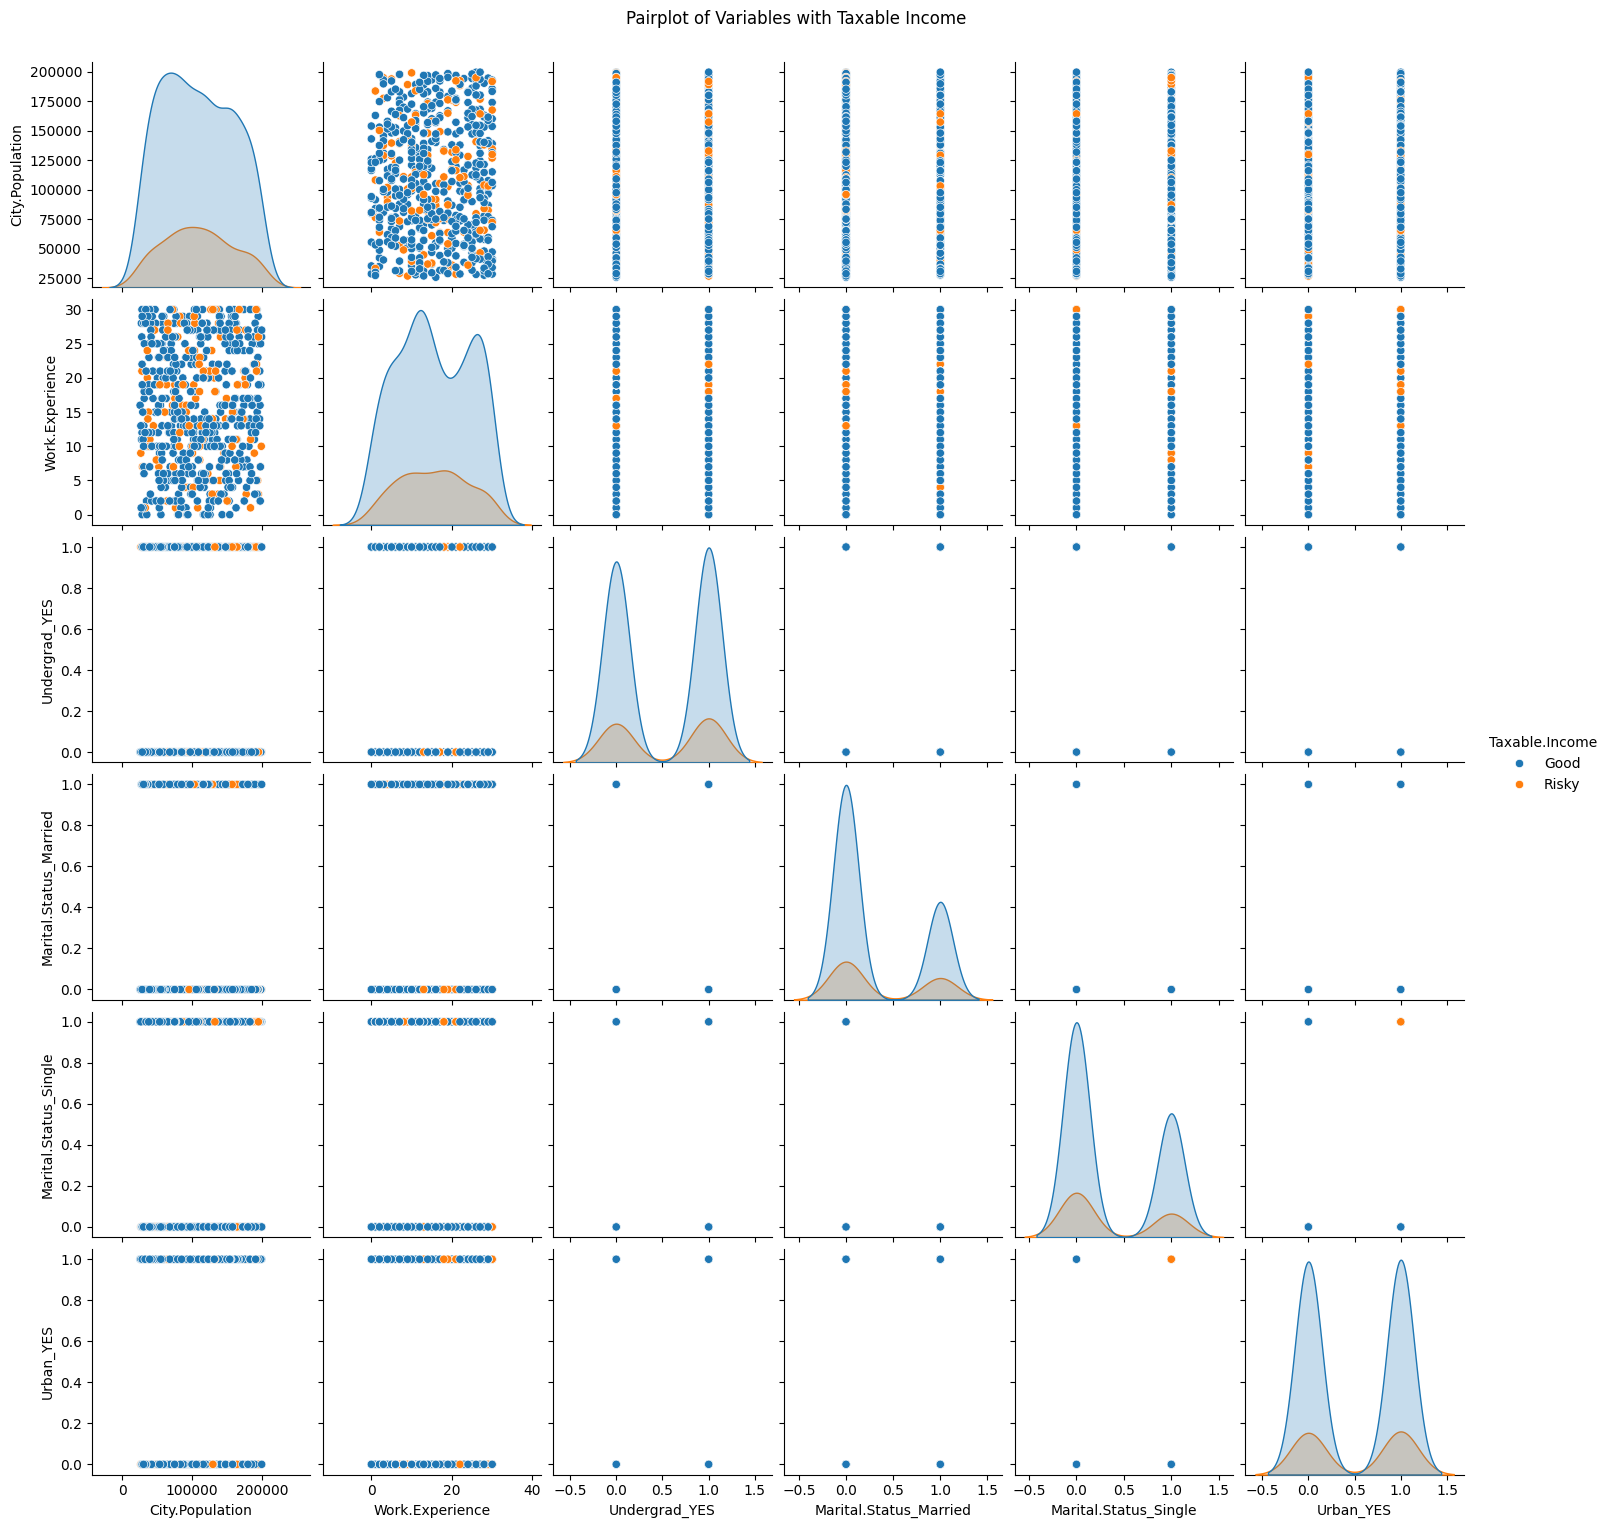

In [38]:
#Bivariate Analysis
sns.pairplot(data, hue='Taxable.Income')
plt.suptitle('Pairplot of Variables with Taxable Income', y=1.02)
plt.show()

<ipython-input-39-78197c5a618a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


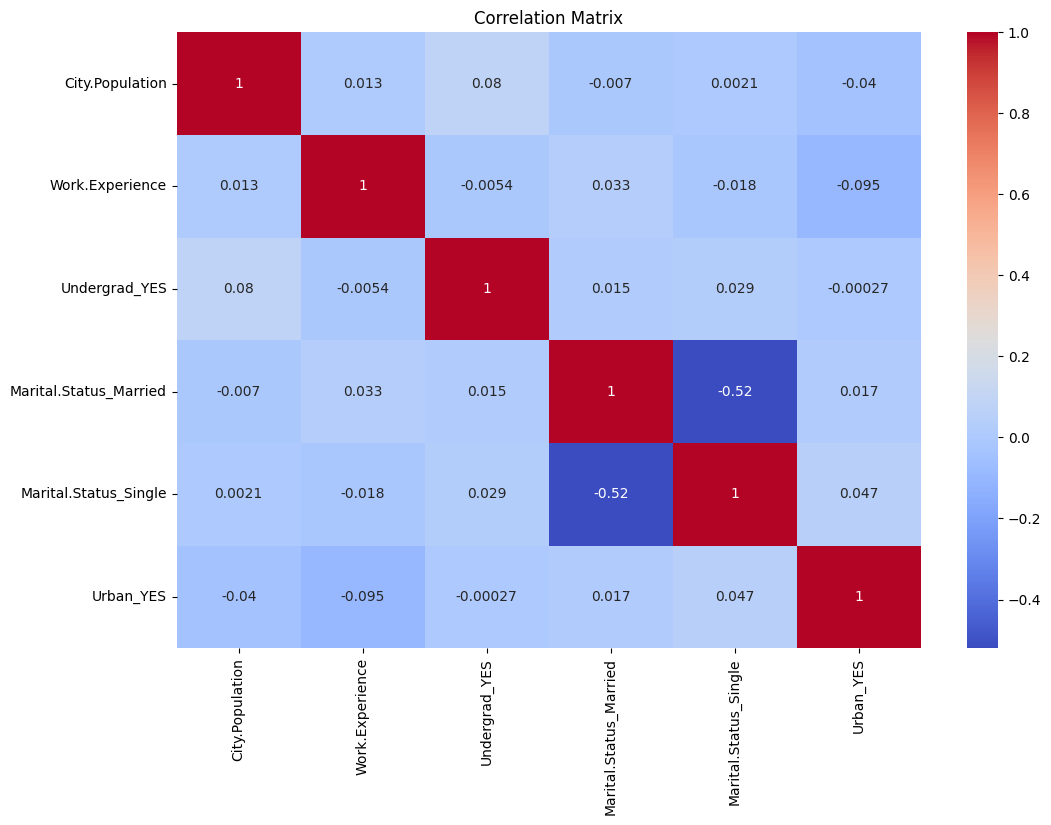

In [39]:
#multivariate Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights

The best decision tree model achieved an accuracy of approximately 68.75%.
Precision and Recall:
Class 0: Precision and recall are 0.00, indicating the model's inability to correctly predict this class.
Class 1: Precision is 0.72, and recall is 0.81, indicating that the model performs reasonably well in predicting this class.
Class 2: Precision is 0.61, and recall is 0.61, showing moderate performance in predicting this class.
Class 3: Precision is 0.67, and recall is 0.43, indicating that the model struggles more in predicting this class compared to others.
F1-Score: The weighted average F1-score is around 0.68, suggesting a moderate overall performance of the model.

The model performs well in predicting classes 1 and 2 (considered as "Good" and "Risky" respectively) but struggles with class 3.
Class 0 has no correct predictions, indicating a potential imbalance or lack of distinct features for this class.
The model's overall performance is moderate.

# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df= pd.read_csv("/content/Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
#Converting the target variable "Sales" into a categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 5, 10, 15, 20, 25], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [43]:
#Encoding categorical variables
label_encoder = LabelEncoder()
df['ShelveLoc_Encoded'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban_Encoded'] = label_encoder.fit_transform(df['Urban'])
df['US_Encoded'] = label_encoder.fit_transform(df['US'])
df['Sales_Category_Encoded'] = label_encoder.fit_transform(df['Sales_Category'])


In [44]:
#Selecting features and target variable
X = df.drop(columns=['Sales', 'ShelveLoc', 'Urban', 'US', 'Sales_Category', 'Sales_Category_Encoded'])
y = df['Sales_Category_Encoded']

In [45]:
#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#Defining the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

In [48]:
#Initializing the decision tree classifier
decision_tree = DecisionTreeClassifier()

#Initializing GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)


In [49]:
#Fiting the grid search to the data
grid_search.fit(X_train, y_train)

#Geting the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [50]:
#Using the best parameters to build the final decision tree
final_decision_tree = DecisionTreeClassifier(**best_params)
final_decision_tree.fit(X_train, y_train)
y_pred = final_decision_tree.predict(X_test)

In [51]:
#Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6375
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.79      0.73        47
           2       0.67      0.44      0.53        18
           3       0.43      0.43      0.43        14

    accuracy                           0.64        80
   macro avg       0.45      0.42      0.42        80
weighted avg       0.63      0.64      0.63        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


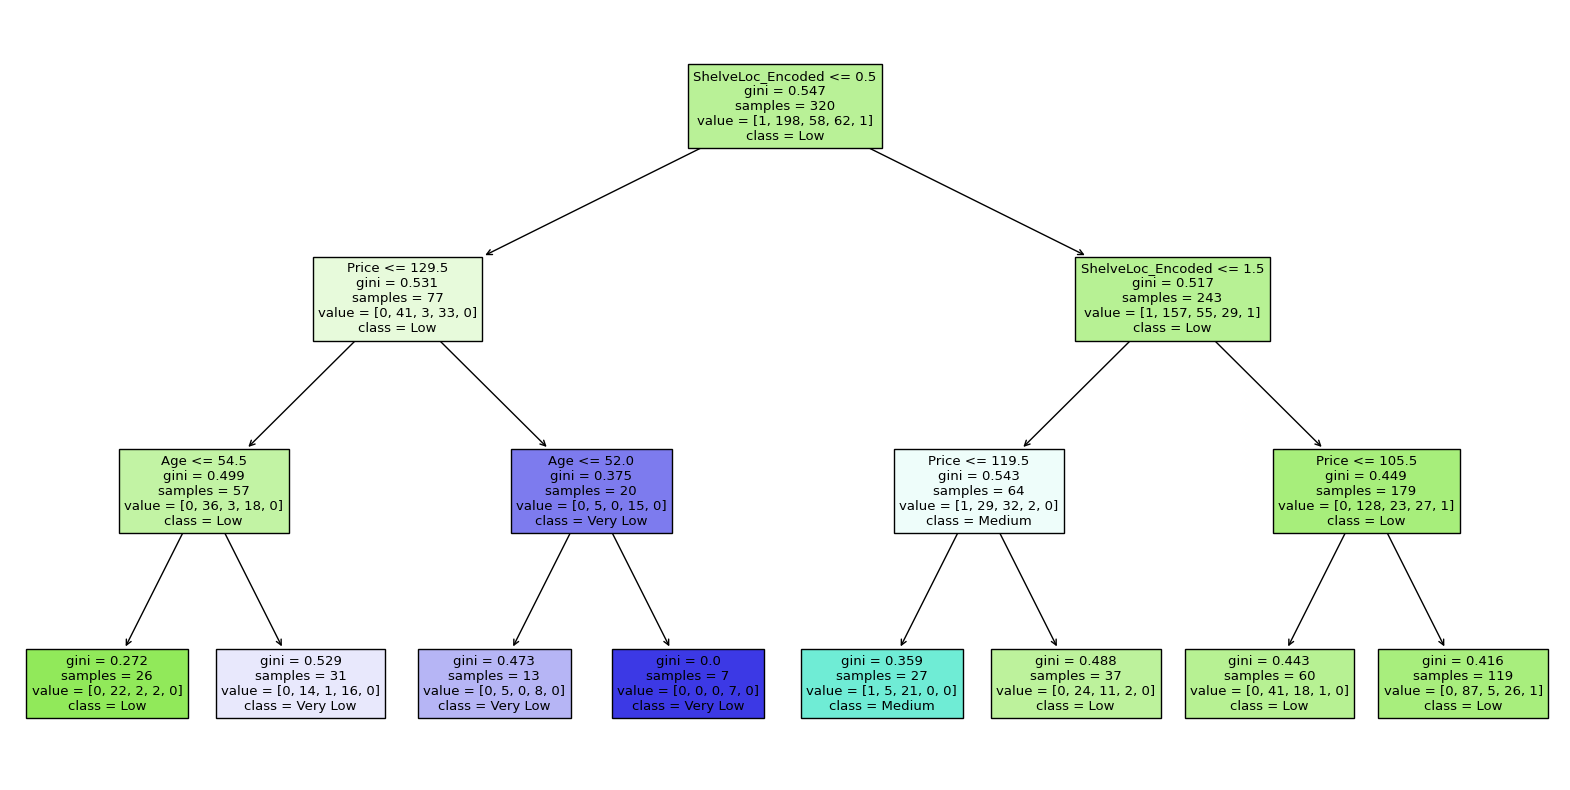

In [53]:
#final decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_decision_tree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

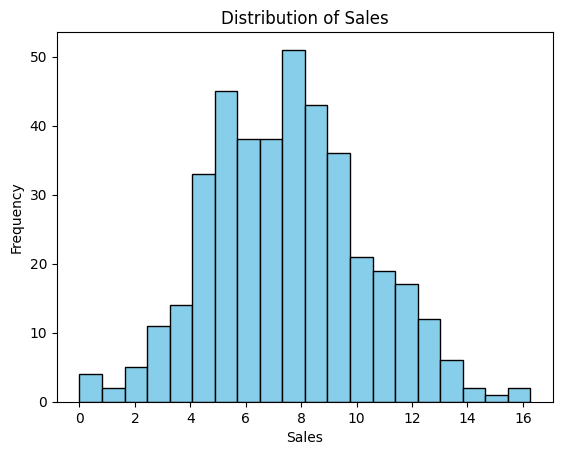

In [54]:
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

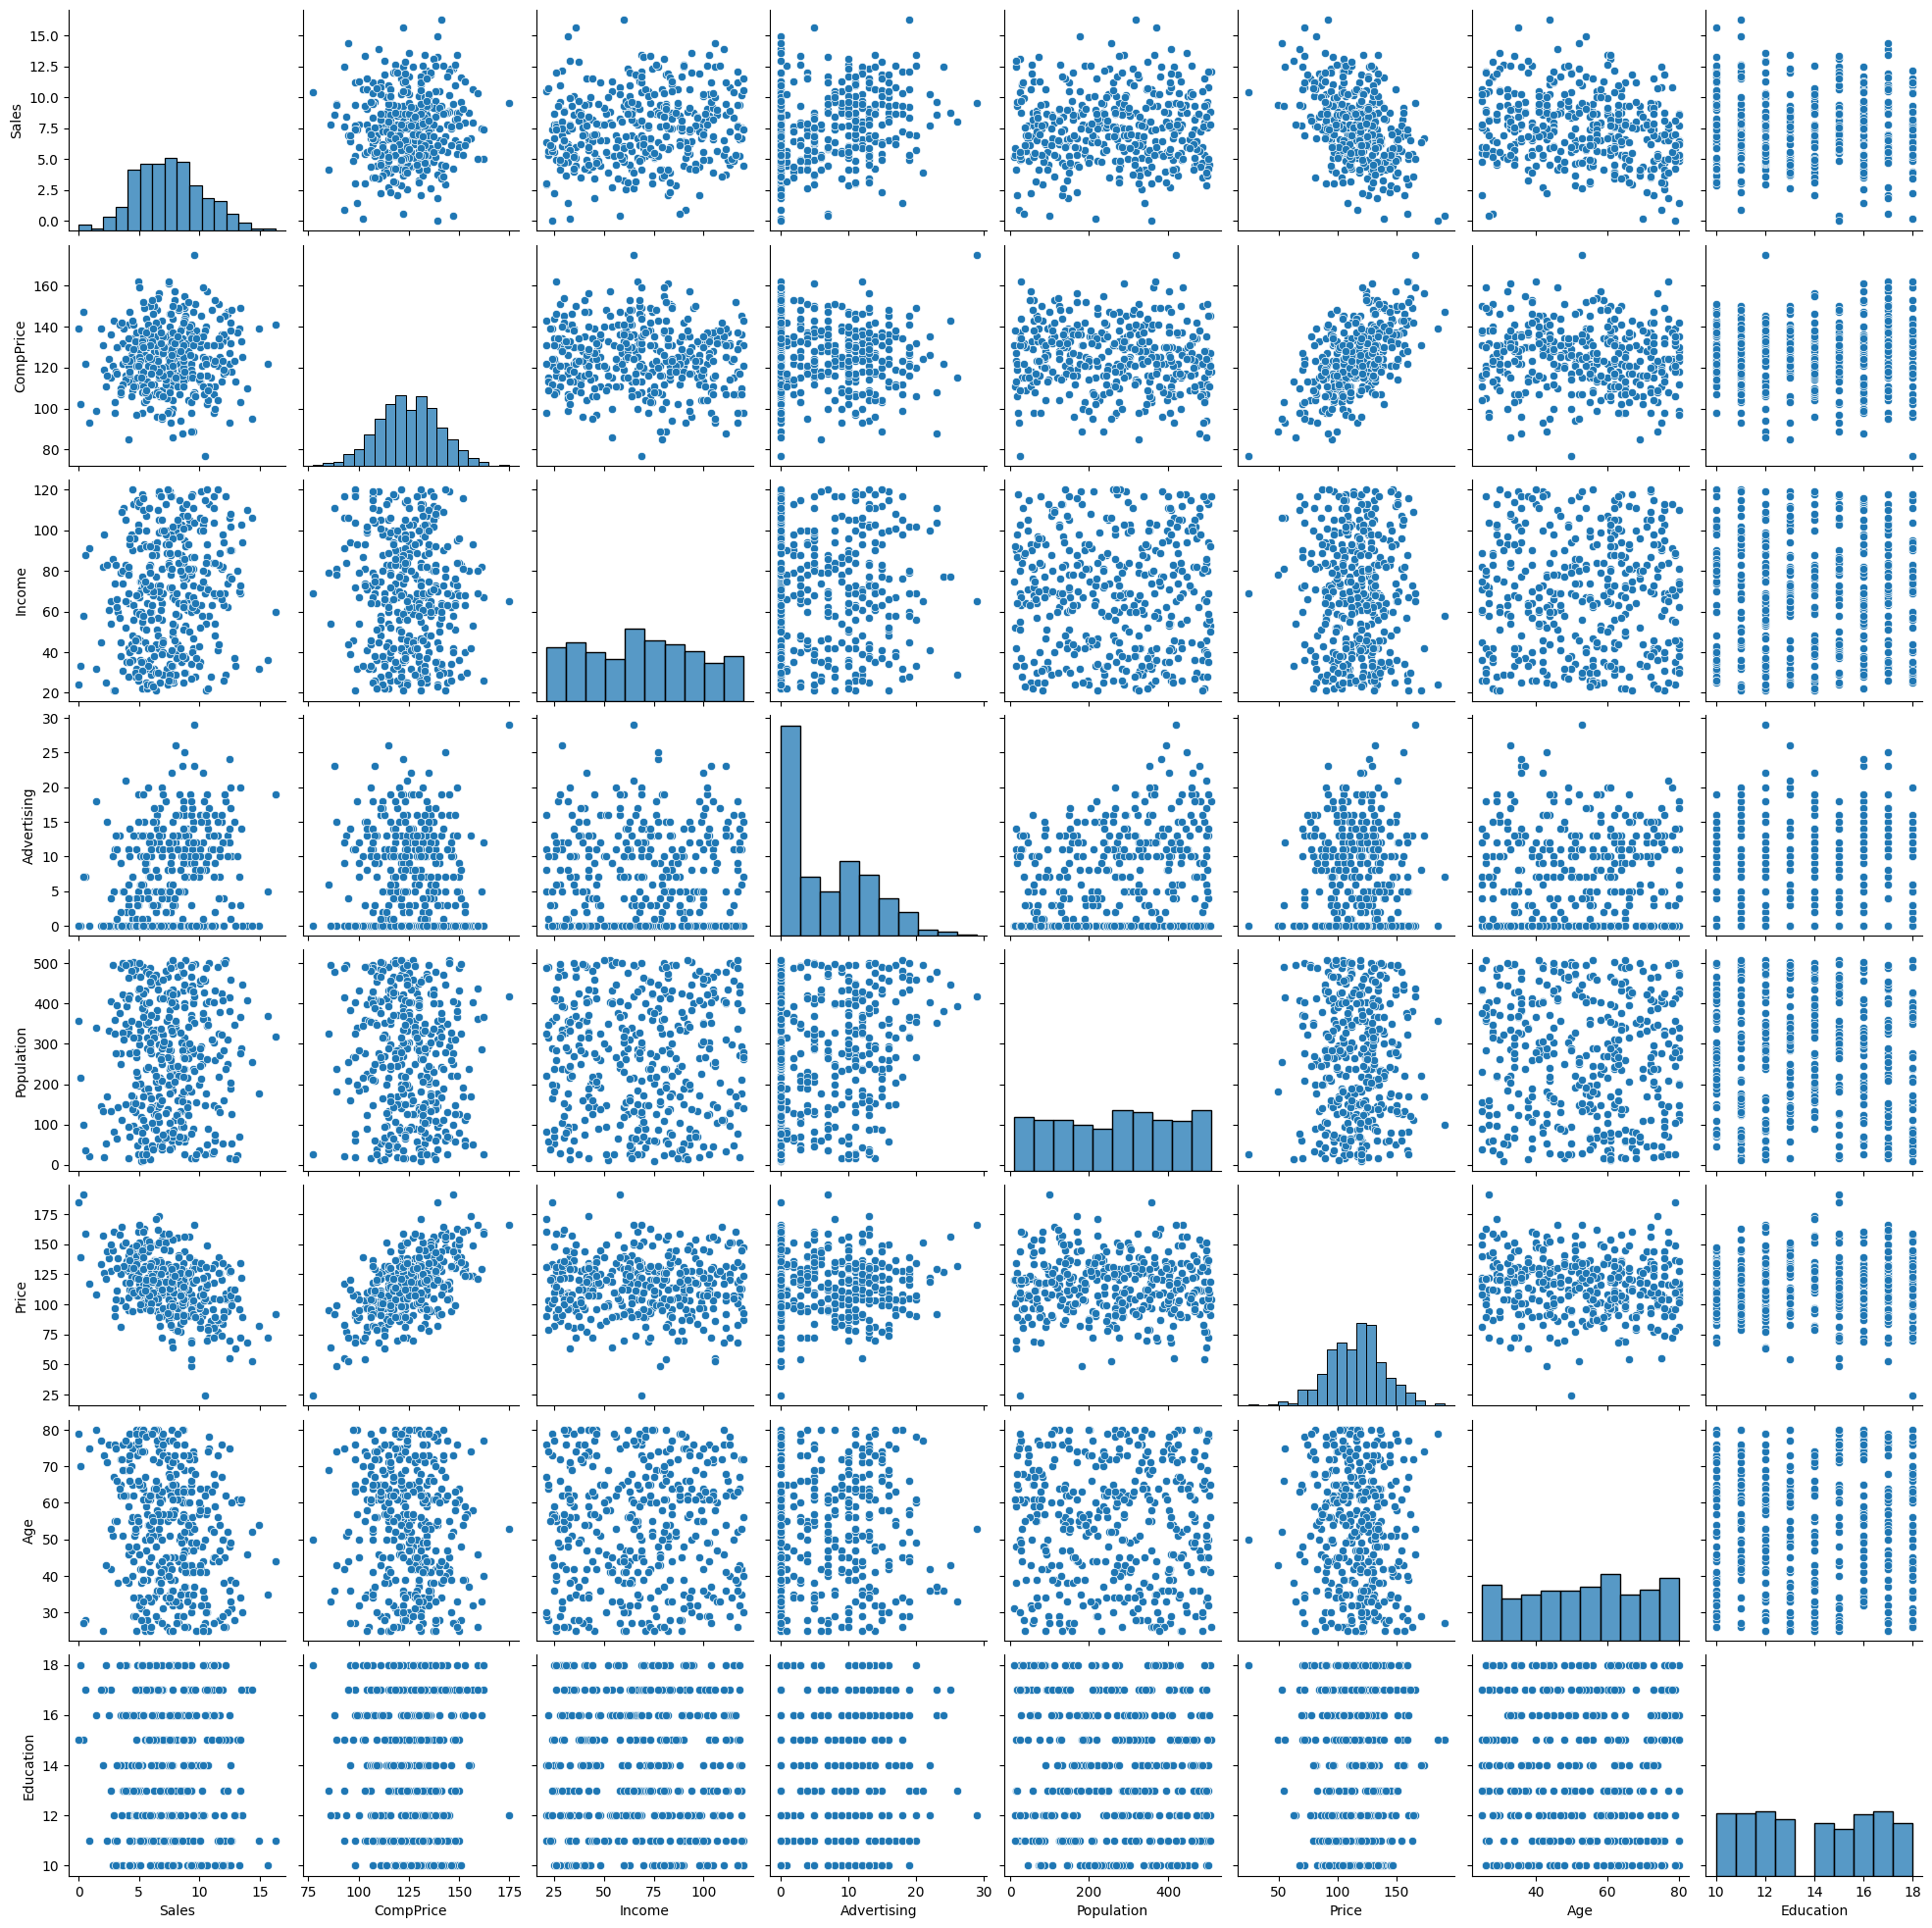

In [55]:
#Univariate analysis
sns.pairplot(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.show()

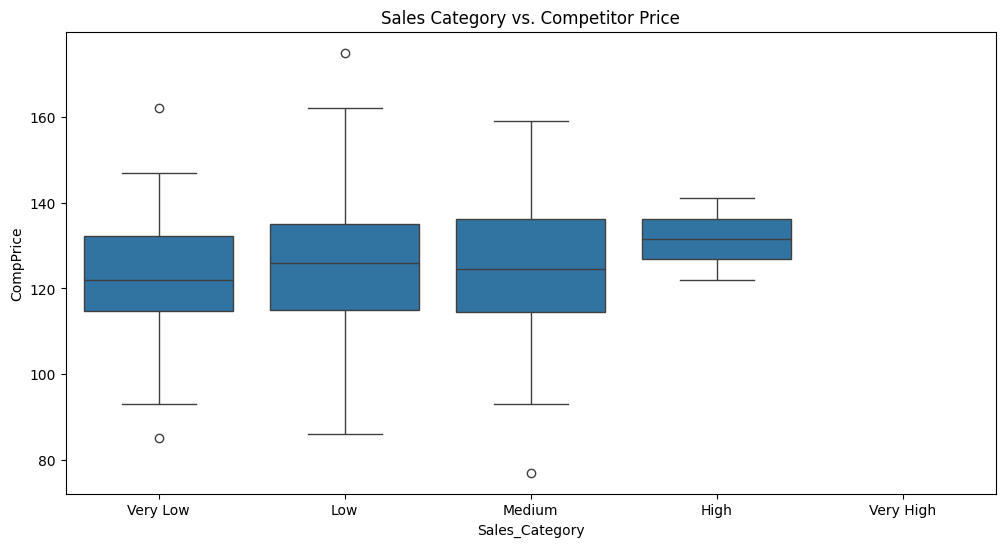

In [56]:
#Bivariate analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales_Category', y='CompPrice', data=df)
plt.title('Sales Category vs. Competitor Price')
plt.show()

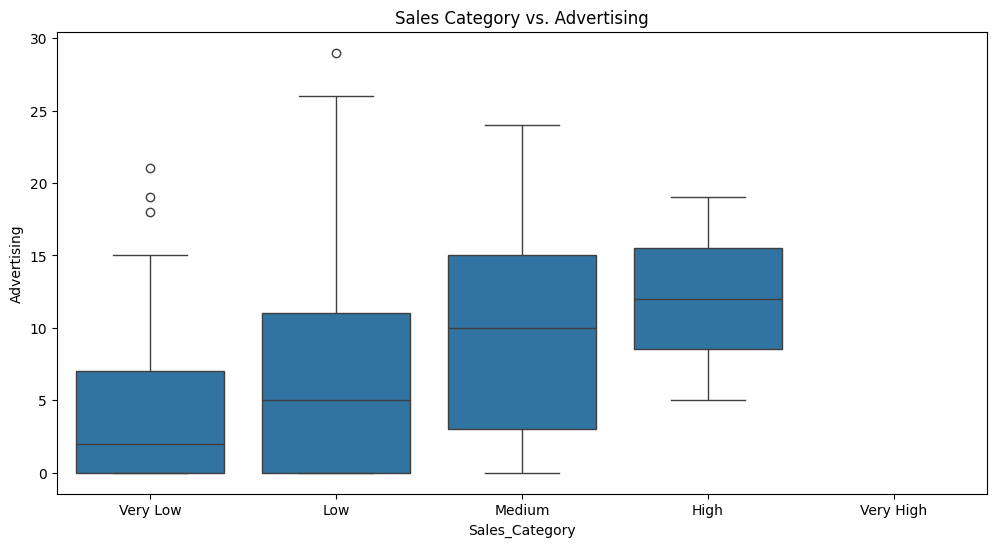

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales_Category', y='Advertising', data=df)
plt.title('Sales Category vs. Advertising')
plt.show()

<ipython-input-58-2119e85e4d2f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


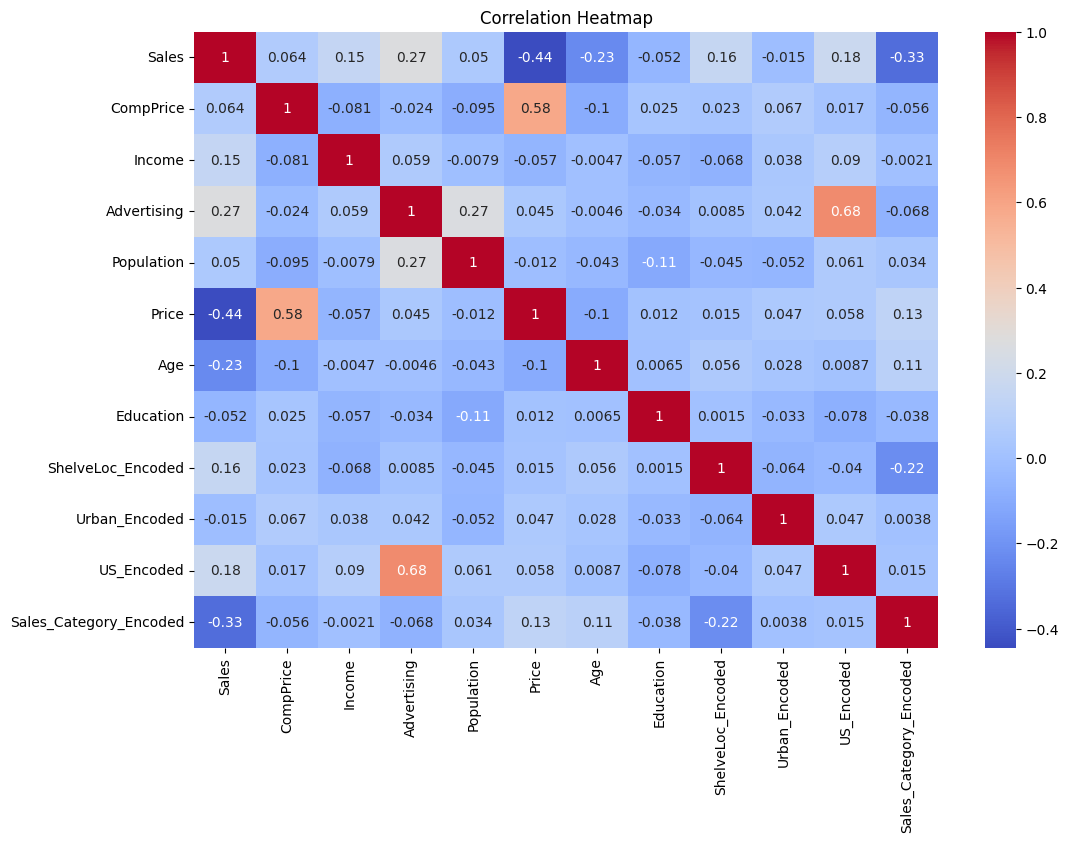

In [58]:
# Multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insights

The decision tree model successfully identified several key factors influencing high sales, including competitor price, advertising budget, shelf location, and population size. By focusing on these factors, the company can potentially increase its sales performance. The model achieved an accuracy of 64%, indicating its effectiveness in classifying sales into different categories.
The decision tree model's best parameters are {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2}, suggesting that a tree with a maximum depth of 3 and other specified parameters is optimal for this dataset.